Tensorflow: Power in Data Science
===

Do you think data science is just to analyze numbers? Do you believe deep learning is too complicated for data science? As "unstructured data" plays an increasingly important role in data science, do not limit yourself to the traditional machine learning models! We can embrace the power of deep learning in your data science projects.

Imagining you are a data scientist at Yelp and you are analyzing the restaurant reviews. Do you know whether a reviewer is more likely to share comments about food or atmosphere? You may choose to analyze the text reviews, time, rating, etc., but it will be more exciting if you take a look at images in reviews. They are eye-catching and convey much information!

Why Tensorflow? Tensorflow is one of the most popular deep learning libraries. The great community enables you to adopt various models to empower your data science project quickly.

Released publicly in 2015, Tensorflow grows rapidly and now provides a series of tools in machine learning, deep learning, debugging, and serving. This tutorial will first introduce Tensorflow basics and some examples. Then, there will be one tool introduction and an application which help to strengthen your understanding and enable you the ability to improve your analysis.

This tutorial will include following parts:  
- [Section 1: Tensorflow ABC](#Section1:-Tensorflow-ABC): introduce basics of Tensorflow, and show a simple "Hello world" perceptron to give you hands-on experience.
- [Section 2: Object Detection](#Section2:-Object-Detection): introduce how to use the object detection model to detect objects when you need.
- [Section 3: Yelp Application](#Section3:-Yelp-Application): introduce a simple data science pipeline to help you using Tensorflow to improve your analysis.

The full package to run this tutorial can be downloaded [here](https://s3.amazonaws.com/15688/Tutorial.zip).

# Prepare

Before we start, we need to install Tensorflow and dependencies using pip3 (using Python 3.6 in this tutorial). Since running the model requires protobuf, a compiled environment can be accessed at [code](https://github.com/yushiy/tutorial.git).

```shell

pip3 install tensorflow

```

In [1]:
import tensorflow as tf


# Section1: Tensorflow ABC

## Graph approach

As you may know, Tensorflow is orginally designed for deep learning, so it is natural to adopt a graph approach. The graph approach means models are desribed as graphs and calculation is conveyed as flows over the graph. While it is also very common to describe traditional machine learning models as directed graph, you can easily make good use of both them when using Tensorflow.

Using a graph approach, the basic workflow in Tensorflow is to:
 - Step 1: assemble a _**graph**_ using APIs, including nodes and operations
 - Step 2: use a _**session**_ to execute the operations
 - Step 3: make the graph _**feedable**_ and _**train**_ the model

In this section, I will walk through the basics of Tensorflow using the simplest perceptron as an example. It will give you the power to build your own model!

## Step 1: What is tensor?

As the name of Tensorflow indicates, there will be "tensors" flowing in Tensorflow. Generally speaking, we usually use _**tensor**_ and variables to store nodes and network structure. In this part, I will use a perceptron as an example to show you how tensors construct the machine learning model.

The graph below describes the structure of this perceptron. We are trying to multiply the input matrix `x` and the weight matrix `w`. Then we add the result with the residual vector `b` to get `layer 1`. The structure Followed with a `softmax` function, we finish the basic structure of the perceptron, in five lines!
<img src="./1.png" width=800 height=600/>


In [3]:
# cell one
x = tf.Variable([[2.0,3.0],[3.0, 4.0]], name='x')

# cell two
w = tf.Variable([[0.0,0.0],[0.0,0.0]], name='w')

# cell three: multiply x and w
mul = tf.matmul(x, w)

# cell four
b = tf.Variable([0.0,0.0], name='b')

# cell five: the value for layer one
layer1 = tf.add(mul, b, name='layer1')

# cell six: the softmax value 
y = tf.nn.softmax(layer1, name='softmax')
print('x:', x,'w:', w,'mul:', mul,'b:', b,'layer1:', layer1,'y:', y)


# Result:
# x: <tf.Variable 'x_4:0' shape=(2, 2) dtype=float32_ref> w: <tf.Variable 'w_4:0' shape=(2, 2) dtype=float32_ref> mul: Tensor("MatMul_4:0", shape=(2, 2), dtype=float32) b: <tf.Variable 'b_4:0' shape=(2,) dtype=float32_ref> layer1: Tensor("layer1_4:0", shape=(2, 2), dtype=float32) y: Tensor("softmax_4:0", shape=(2, 2), dtype=float32)


x: <tf.Variable 'x_1:0' shape=(2, 2) dtype=float32_ref> w: <tf.Variable 'w_1:0' shape=(2, 2) dtype=float32_ref> mul: Tensor("MatMul_1:0", shape=(2, 2), dtype=float32) b: <tf.Variable 'b_1:0' shape=(2,) dtype=float32_ref> layer1: Tensor("layer1_1:0", shape=(2, 2), dtype=float32) y: Tensor("softmax_1:0", shape=(2, 2), dtype=float32)


## Step2: Session

As you can see from the result above, y is not the actual value of layer1. This is because the above code only describe the _**graph structure**_. You can think it is _**static**_. Now we are going to run it!

Session is what we use to run a graph. Within a session, we can run a operator in its _**default**_ graph, and evaluate the values of operators(e.g. tensors).

Note:

1. Tensorflow uses a subgraph approach. That means it will only calculate the nodes related to the nodes you called `run()`. This will save cost and enable Tensorflow to work distributedly.

2. Initialize your Variables! Using the `tf.Variable()` does not initialize the variables for you. Try to comment the two lines that initializing the Variables and see what would happen. You can refer to [https://www.tensorflow.org/versions/r1.0/programmers_guide/variables](https://www.tensorflow.org/versions/r1.0/programmers_guide/variables) to know why this exception appears.

In [10]:
with tf.Session() as session:
    ## Try to comment the following two lines to see what happens
    init = tf.global_variables_initializer()
    session.run(init)
    
    res = session.run(y)
    print("res:", type(res), res)
    

# Result:
# res: <class 'numpy.ndarray'> [[0.5 0.5]
#  [0.5 0.5]]

res: <class 'numpy.ndarray'> [[0.5 0.5]
 [0.5 0.5]]


### Excercise
Instead of using `with tf.Session() as session:`, you can directly create the session and use it to run the graph without any indention. What's the difference between the two ways?

_Hints:_  
You can refer to [Interactive Session](https://www.tensorflow.org/api_docs/python/tf/InteractiveSession).

## Graph

Although we have build the nodes and edges, it seems we can not use them as one whole graph. Do not worry! In Tensorflow, `tf.Graph()` is the place that keep the structure and other "collections" like variables. The nodes and edges of the graph, indicating how individual operations are composed together.

In the following block, the previous code describing the perceptron stucture was put in a explicit graph. To run this graph in a session, just set it as the default graph of the session you are running.


In [7]:
# initialize a graph
g = tf.Graph()

# set your nodes in this graph
with g.as_default():
    x = tf.Variable([[2.0,3.0],[3.0, 4.0]], name='x')
    w = tf.Variable([[0.0,0.0],[0.0,0.0]], name='w')
    mul = tf.matmul(x, w)
    b = tf.Variable([0.0,0.0], name='b')
    layer1 = tf.add(mul, b, name='layer1')
    y = tf.nn.softmax(layer1, name='softmax')

# set the session's graph to g
with tf.Session(graph=g) as session:
    init = tf.global_variables_initializer()
    session.run(init)    
    res = session.run(y)
    print("res:", type(res), res)

# Result:
# res: <class 'numpy.ndarray'> [[0.5 0.5]
#  [0.5 0.5]]

# Now the graph g contains all nodes, operators, etc. you set in the above block
# Feel free to use the graph in your session!

    

res: <class 'numpy.ndarray'> [[0.5 0.5]
 [0.5 0.5]]


### Exercise

What would happen if you do not use graph explicitly? The graph still can run, right? Actually, if you do not create a graph explicitly, the operators will be implicitly stored in the default graph. You can access the graph using `tf.get_default_graph()`. What's the difference between the explicit graph and the implicit grpah?

_Hints:_  
You can refer to [https://www.tensorflow.org/programmers_guide/graphs](https://www.tensorflow.org/programmers_guide/graphs) and pay attention to the note in the "Programming with multiple graphs" section.

## TensorBoard

Machine learning programs are really hard to debug but TensorBoard is powerful in helping you! You can use TensorBoard to visualize your graph, plot quantitative metrics about the execution of your graph, and show additional data like images that pass through it. 

How to use it? Just add a file writer in your graph and run the following the command at shell.
```shell

tensorboard --logdir="./graphs" --port 6006

```


In [8]:
with tf.Session(graph=g) as session:
    # add a summary writer in the session
    writer = tf.summary.FileWriter('./graphs', session.graph)
writer.close()

Now open [board](http://localhost:6006/) at `http://localhost:6006/`. Below is the TensorBoard of the current perceptron graph. You can see three big nodes `x`, `w`, and `b`. There are three small "init" circles near them, which means they require initialization. Edges show the relation of nodes. For example, the MatMul node comes from x and w. And if you zoom the graph out, you will see "2\*2" on the edge, indicating the matrix to MatMul is 2\*2.


<img src="2.png" width="1000" height="800"/>

## Placeholder

Congratulations! You almost successfully build a perceptron graph using Tensorflow! 

However, this is a static graph. Before you _**train**_ your model, you need to make your graph _**"feedable"**_, which means the training process can easily change the value of the input, weights, etc. iteratively. You will need the help of placeholders.

A feedable iterator can be used together with `tf.placeholder` to select what iterator to use in each call to `session.run()`, via the familiar `feed_dict` mechanism. It offers the same functionality as a reinitializable iterator, but it does not require you to initialize the iterator from the start of a dataset when you switch between iterators. 

As the name indicates, placeholders will hold the value for you. You can build your model sturcture without knowing the value and leave it for the feedable iterator. That means you can easily change their values when you train it.

Using placeholders, you can simply use the constructor and set the shape. Compare the following code block with the previous one, and find the difference :)


[[0.4924006  0.5075994 ]
 [0.49320042 0.5067996 ]]
Training step: 0000 cost= 14.957809448
[[0.24217847 0.7578215 ]
 [0.26425254 0.73574746]]
Training step: 0050 cost= 13.785465240
[[0.1501252  0.84987485]
 [0.17371467 0.8262853 ]]
Training step: 0100 cost= 13.452857971
[[0.10764141 0.8923586 ]
 [0.12949844 0.8705015 ]]
Training step: 0150 cost= 13.315710068
[[0.0836454  0.9163546 ]
 [0.10351706 0.89648294]]
Training step: 0200 cost= 13.242458344
[[0.06829716 0.93170285]
 [0.08640192 0.91359806]]
Training step: 0250 cost= 13.197063446
[[0.05765186 0.9423482 ]
 [0.07425231 0.9257477 ]]
Training step: 0300 cost= 13.166178703
[[0.04984025 0.9501598 ]
 [0.0651655  0.9348345 ]]
Training step: 0350 cost= 13.143792152
[[0.04386586 0.9561341 ]
 [0.05810326 0.9418968 ]]
Training step: 0400 cost= 13.126806259
[[0.03915001 0.96085006]
 [0.05245085 0.94754916]]
Training step: 0450 cost= 13.113468170
[[0.03533364 0.9646664 ]
 [0.04782056 0.9521795 ]]
Training step: 0500 cost= 13.102711678
[[0.032182

[[0.0031565  0.99684346]
 [0.00531153 0.9946885 ]]
Training step: 5200 cost= 13.010700226
[[0.00312442 0.9968755 ]
 [0.00526214 0.9947379 ]]
Training step: 5250 cost= 13.010599136
[[0.00309296 0.99690706]
 [0.00521366 0.99478626]]
Training step: 5300 cost= 13.010501862
[[0.00306209 0.9969379 ]
 [0.00516606 0.99483395]]
Training step: 5350 cost= 13.010404587
[[0.00303182 0.9969682 ]
 [0.00511934 0.9948807 ]]
Training step: 5400 cost= 13.010309219
[[0.00300211 0.99699795]
 [0.00507344 0.9949266 ]]
Training step: 5450 cost= 13.010216713
[[0.00297296 0.9970271 ]
 [0.00502837 0.99497163]]
Training step: 5500 cost= 13.010124207
[[0.00294435 0.99705565]
 [0.0049841  0.9950159 ]]
Training step: 5550 cost= 13.010035515
[[0.00291626 0.9970837 ]
 [0.00494059 0.9950595 ]]
Training step: 5600 cost= 13.009946823
[[0.00288869 0.9971113 ]
 [0.00489785 0.99510217]]
Training step: 5650 cost= 13.009860039
[[0.0028616  0.9971384 ]
 [0.00485583 0.99514425]]
Training step: 5700 cost= 13.009773254
[[0.002835

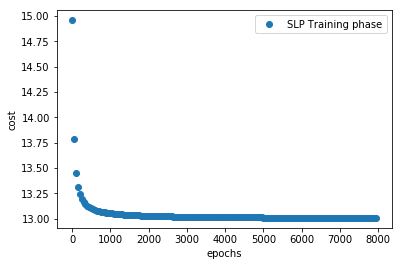

In [4]:
from matplotlib import pyplot as plt
import numpy as np

%matplotlib inline
def perceptron(inputX, inputY):
    
    learning_rate = 0.0008
    training_epochs = 8000
    display_step = 50
    
    # set your nodes in this graph
    g = tf.Graph()
    with g.as_default():
        # change the variable x to placeholder
        x = tf.placeholder(tf.float32, [None, 2], name='x')

        w = tf.Variable([[0.0,0.0],[0.0,0.0]], name='w')
        mul = tf.matmul(x, w)
        b = tf.Variable([0.0,0.0], name='b')
        layer1 = tf.add(mul, b, name='layer1')
        y = tf.nn.softmax(layer1, name='softmax')

        # Below is adding the variables for training

        # the y from the training set
        y_ = tf.placeholder(tf.float32, [None, 2], name='y_')

        # calculate the difference between y and y_
        cost = tf.reduce_sum(tf.pow(y_-y,2))

        # use the optimizer
        optimizer =tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)


    with tf.Session(graph=g) as sess:
        avg_set = []
        epoch_set = []
        init = tf.global_variables_initializer()
        sess.run(init)
        writer = tf.summary.FileWriter('./graphs', sess.graph)

        for i in range(training_epochs):
            sess.run(optimizer, feed_dict = {x: inputX, y_:inputY})

            #log training
            if i % display_step == 0:
                cc = sess.run(cost, feed_dict = {x: inputX, y_:inputY})
                #check what it thinks when you give it the input data
                print(sess.run(y, feed_dict = {x:inputX}))


                print("Training step:", '%04d' % (i), "cost=", "{:.9f}".format(cc))
                avg_set.append(cc)
                epoch_set.append(i + 1)

        training_cost = sess.run(cost, feed_dict = {x: inputX, y_: inputY})
        print("Training cost = ", training_cost, "\nW=", sess.run(w),
              "\nb=", sess.run(b))
    writer.close()
    plt.plot(epoch_set,avg_set,'o',label = 'SLP Training phase')
    plt.ylabel('cost')
    plt.xlabel('epochs')
    plt.legend()
    plt.show()

inputX = np.array([[  2,   3],
                   [  1,   3]])
inputY = np.array([[  2,   3],
                   [  1,   3]])

perceptron(inputX, inputY)

The training cost is shown below:  
<img src="3.png" />

### Excercise

Now you have a trained model, try to store it in a file for further use!

_Hints_:  
You can refer to [https://www.tensorflow.org/programmers_guide/saved_model](https://www.tensorflow.org/programmers_guide/saved_model).

# Section2: Object Detection

Now you know how to build and train a model using Tensorflow! This section will introduce a deep learnig tool object detection as a example to deepen your understanding of Tensorflow concepts. Besides, this is an introduction how to use the thousands of available models in the world of Tensorflow.

We can easily make use of the object recognization model released by Google. Google provides many [pre-trained model](https://github.com/tensorflow/models/blob/master/research/object_detection/g3doc/detection_model_zoo.md) for us. Just select the proper one and download it. Then unzip the model folder and put it in the same directory.
The `frozen_inference_graph.pb` file contains the information we will use in following example.

Before we begin, we need protobuf installed. You can install it using the commands below.

```shell

git clone https://github.com/tensorflow/models.git
protoc object_detection/protos/*.proto --python_out=.

```



# Load model as a graph

First, we will load a pre-trained model as a Tensorflow graph. This part acts both to deepen your understanding of Tensorflow graph and a tool to embrace Tensorflow models in your project. Remember, the model graph describes the network structure. You should already know that after section 1.

As a exercise, please address the following questions:
1. Which variable refers to the model?
2. How we process the "model file" to get the model ready?
3. What is the function of "GraphDef"?

In [16]:
path = 'tf/faster_rcnn_inception_v2_coco_2018_01_28' + '/frozen_inference_graph.pb'
def load_model():
    """
    Load the pre-trained 'frozen' model to memory
    :return: the pre-trained model as a Tensorflow graph
    """

    # new a grach in tensorflow
    detection_graph = tf.Graph()

    # set this graph as default graph
    with detection_graph.as_default():
        od_graph_def = tf.GraphDef()

        # load the pre-trained graph model
        with tf.gfile.GFile(path, 'rb') as fid:
            serialized_graph = fid.read()

            # parse and import the pre-trained graph model
            od_graph_def.ParseFromString(serialized_graph)
            tf.import_graph_def(od_graph_def, name='')

    return detection_graph

detection_graph = load_model()
print(detection_graph)

The following part loads the category dictionary to help us translate the model output(1,2,3, etc.) to object names (person, bicycle, car, etc.). If you are interested, you can try to look into the the `convert_label_map_to_categories` function to see how Tensorflow store the label maps.

In [17]:
import os
from itertools import islice
from object_detection.utils import label_map_util

PATH_TO_LABELS = 'tf/object_detection/data/'+'mscoco_label_map.pbtxt'
NUM_CLASSES = 90

def load_label_map():
    """
    Label maps map indices to category names,
    so that when our model predicts 5,
    we know that this corresponds to airplane.
    Here we use internal utility functions,
    but anything that returns a dictionary mapping integers to appropriate string labels would be fine
    :return: category list and index dictionary
    """
    label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
    categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=NUM_CLASSES, 
                                                                use_display_name=True)
    category_index = label_map_util.create_category_index(categories)
    
    return categories, category_index


categories, category_index = load_label_map()
# print the catefories out to show you a map of the categories, not necessaty in practice
print("category sample: ", categories[:5])
print("category index sample", list(islice(category_index.items(), 5)))


# Result:
# category sample:  [{'id': 1, 'name': 'person'}, {'id': 2, 'name': 'bicycle'}, {'id': 3, 'name': 'car'}, {'id': 4, 'name': 'motorcycle'}, {'id': 5, 'name': 'airplane'}]
# category index sample [(1, {'id': 1, 'name': 'person'}), (2, {'id': 2, 'name': 'bicycle'}), (3, {'id': 3, 'name': 'car'}), (4, {'id': 4, 'name': 'motorcycle'}), (5, {'id': 5, 'name': 'airplane'})]


category sample:  [{'id': 1, 'name': 'person'}, {'id': 2, 'name': 'bicycle'}, {'id': 3, 'name': 'car'}, {'id': 4, 'name': 'motorcycle'}, {'id': 5, 'name': 'airplane'}]
category index sample [(1, {'id': 1, 'name': 'person'}), (2, {'id': 2, 'name': 'bicycle'}), (3, {'id': 3, 'name': 'car'}), (4, {'id': 4, 'name': 'motorcycle'}), (5, {'id': 5, 'name': 'airplane'})]


In the `load_image` function below, we load the image and reshape it for input.

In [22]:
from PIL import Image
import numpy as np

# Size, in inches, of the output images.
image_file = 'tf/t1.jpg'
def load_image(image_path):
    image = Image.open(image_path)
    (im_width, im_height) = image.size
    return np.array(image.getdata()).reshape(
        (im_height, im_width, 3)).astype(np.uint8)

image = load_image(image_file)
print(image)

[[[203 192 162]
  [203 192 162]
  [202 191 161]
  ...
  [122  76  40]
  [123  77  41]
  [123  77  41]]

 [[205 194 164]
  [205 194 164]
  [207 193 164]
  ...
  [119  73  37]
  [121  75  39]
  [122  76  40]]

 [[205 191 162]
  [206 192 163]
  [207 193 164]
  ...
  [118  70  34]
  [118  72  36]
  [120  74  38]]

 ...

 [[253 218 162]
  [252 215 160]
  [253 216 163]
  ...
  [172 117  76]
  [175 120  79]
  [176 121  80]]

 [[252 216 158]
  [252 215 160]
  [253 214 159]
  ...
  [172 117  76]
  [175 120  79]
  [175 120  79]]

 [[252 216 158]
  [254 217 162]
  [252 213 158]
  ...
  [174 119  78]
  [176 121  80]
  [175 120  79]]]


Now both the input matrix and the pre-trained model are ready. The following block will help you with the details to make inference.

First, the following function iterate the operations in the graph to handle the "runnable" tensors. Then it process the "changable" variables to fit the model input. Then it calls `run()` to calculate.

Take a look at the output below. You can find the detected objects, confidence scores, and positions.

### Excercise

In the following code block, which parts will be changed in the process of training? 

_Hints:_  
Pay attention to session's `run()` method.

In [23]:
def run_inference_for_image(image, graph):
    # use the previous model that we set as default
    with graph.as_default():
        with tf.Session() as sess:
            
            # Get handles to input and output tensors
            ops = tf.get_default_graph().get_operations()
            all_tensor_names = {output.name for op in ops for output in op.outputs}
            tensor_dict = {}
            for key in [
                'num_detections', 'detection_boxes', 'detection_scores',
                'detection_classes', 'detection_masks'
            ]:
                tensor_name = key + ':0'
                if tensor_name in all_tensor_names:
                    tensor_dict[key] = tf.get_default_graph().get_tensor_by_name(
                        tensor_name)
            
            # get tensor name
            if 'detection_masks' in tensor_dict:
                # The following processing is only for single image
                detection_boxes = tf.squeeze(tensor_dict['detection_boxes'], [0])
                detection_masks = tf.squeeze(tensor_dict['detection_masks'], [0])
                # Reframe is required to translate mask from box coordinates to image coordinates and fit the image size.
                real_num_detection = tf.cast(tensor_dict['num_detections'][0], tf.int32)
                detection_boxes = tf.slice(detection_boxes, [0, 0], [real_num_detection, -1])
                detection_masks = tf.slice(detection_masks, [0, 0, 0], [real_num_detection, -1, -1])
                detection_masks_reframed = utils_ops.reframe_box_masks_to_image_masks(
                    detection_masks, detection_boxes, image.shape[0], image.shape[1])
                detection_masks_reframed = tf.cast(
                    tf.greater(detection_masks_reframed, 0.5), tf.uint8)
                
                # Follow the convention by adding back the batch dimension
                tensor_dict['detection_masks'] = tf.expand_dims(
                    detection_masks_reframed, 0)
            image_tensor = tf.get_default_graph().get_tensor_by_name('image_tensor:0')

            # Run inference
            output_dict = sess.run(tensor_dict,
                                   feed_dict={image_tensor: np.expand_dims(image, 0)})

            # all outputs are float32 numpy arrays, so convert types as appropriate
            output_dict['num_detections'] = int(output_dict['num_detections'][0])
            output_dict['detection_classes'] = output_dict[
                'detection_classes'][0].astype(np.uint8)
            output_dict['detection_boxes'] = output_dict['detection_boxes'][0]
            output_dict['detection_scores'] = output_dict['detection_scores'][0]
            if 'detection_masks' in output_dict:
                output_dict['detection_masks'] = output_dict['detection_masks'][0]
            print(output_dict)
    return output_dict

output_dict = run_inference_for_image(image, detection_graph)

{'num_detections': 11, 'detection_boxes': array([[0.1421992 , 0.560915  , 0.69866425, 0.9900181 ],
       [0.17930919, 0.15961955, 0.71452284, 0.5608318 ],
       [0.        , 0.7110032 , 0.15234932, 0.7827512 ],
       [0.        , 0.04697239, 0.9646566 , 1.        ],
       [0.        , 0.7706044 , 0.10572242, 0.9547296 ],
       [0.        , 0.01337597, 0.21126978, 0.65534925],
       [0.23902158, 0.01248575, 0.36175826, 0.18523216],
       [0.74231577, 0.00480122, 0.9955303 , 0.15897727],
       [0.24915609, 0.00408779, 0.35493848, 0.19375414],
       [0.10698494, 0.570217  , 0.71175164, 0.96101   ],
       [0.3791625 , 0.        , 0.9819484 , 0.9827467 ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.

The following block will run a simple objecgt detection pipeline and show you how to visualize the detection result.

['tf/t1.jpg']
{'num_detections': 11, 'detection_boxes': array([[0.1421992 , 0.560915  , 0.69866425, 0.9900181 ],
       [0.17930919, 0.15961955, 0.71452284, 0.5608318 ],
       [0.        , 0.7110032 , 0.15234932, 0.7827512 ],
       [0.        , 0.04697239, 0.9646566 , 1.        ],
       [0.        , 0.7706044 , 0.10572242, 0.9547296 ],
       [0.        , 0.01337597, 0.21126978, 0.65534925],
       [0.23902158, 0.01248575, 0.36175826, 0.18523216],
       [0.74231577, 0.00480122, 0.9955303 , 0.15897727],
       [0.24915609, 0.00408779, 0.35493848, 0.19375414],
       [0.10698494, 0.570217  , 0.71175164, 0.96101   ],
       [0.3791625 , 0.        , 0.9819484 , 0.9827467 ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 

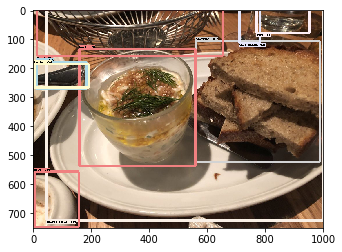

In [25]:
from PIL import Image
from object_detection.utils import visualization_utils as vis_util
def show_detection():
    images = ['tf/t1.jpg']
    TEST_IMAGE_PATHS = [os.path.join("", image) for image in images]
    print(TEST_IMAGE_PATHS)
    

    # for image_path in TEST_IMAGE_PATHS:
    image_path = TEST_IMAGE_PATHS[0]
    # the array based representation of the image will be used later in order to prepare the
    # result image with boxes and labels on it.
    image_np = load_image(image_path)
   
    # Actual detection.
    output_dict = run_inference_for_image(image_np, detection_graph)
    # Visualization of the results of a detection.
    vis_util.visualize_boxes_and_labels_on_image_array(image_np, output_dict['detection_boxes'],
        output_dict['detection_classes'], output_dict['detection_scores'], category_index,
        instance_masks=output_dict.get('detection_masks'),use_normalized_coordinates=True,line_thickness=8)
#     plt.figure(figsize=IMAGE_SIZE)
    plt.imshow(image_np)
    plt.show()

show_detection()

In the above block, we use the following image as input. The detection result is in the second image.
<img src="t1.jpg" width="600" height="400">  <img src="t1_.png">

# Section3: Yelp Application

Using `dict['detection_classes'][0:dict['num_detections']]` and the category dictionary, you can easily know what objects have been detected in one image. The results help a data scientist knows more about data. 

In this section, I prepared a small real-world dataset for you in the `yelp` folder. Each line in the `data.csv` contains a text review and attached image lists in restaurant "La Palma Mexicatessen". The third column is prepared for you as a reference label indicating whether the reviewer only talks about food. All the images are in the same folder.

The following block guides you to analyze this dataset, using the techiniques described in this tutorial. Have fun!

In [5]:
from tensorflow.contrib.tensor_forest.python import tensor_forest
def yelp():
    # Task 0
    with open("yelp/data1.csv", errors='ignore') as fp:
        data = csv.reader(fp)
        texts = []
        objects = []
        for line in data:
            # Write code: analyze the text review
            
            texts.append()
            
            # Write code: get the objects from images
            
            # get images file paths
            images = line[1].split(",")
            
            # get objects from each image
            objs = []
            for image in images:
                
                obj = []
                # write: get objects from the detection result, work with category to get the object names
                
                
                objs.extend(obj)
            print(objs)
            objects.append(objs)
            
    # Question: Whether a review is mainly about food? Or does it talk about atmosphere, service, etc. ?
    # Task 1: analyze the text
    # Write code
    
    # Task 2: analyze the objects in images
    # Hints: some objects you detected are very informative
    # Write code
    
    # Task 3: use both the text and objects
    
    # Hints: You can use the random forest in Tensorflow contrib
    # Random Forest Parameters
    hparams = tensor_forest.ForestHParams(num_classes=num_classes,
                                          num_features=num_features,
                                          num_trees=num_trees,
                                          max_nodes=max_nodes).fill()

    # Build the Random Forest
    forest_graph = tensor_forest.RandomForestGraphs(hparams)
    

# Reference

1. Tensorflow: [https://github.com/tensorflow/models/tree/master/research/object_detection](https://github.com/tensorflow/models/tree/master/research/object_detection)
2. Stanford CS 20SI: Tensorflow for Deep Learning Research: [https://web.stanford.edu/class/cs20si/](https://web.stanford.edu/class/cs20si/)